<a href="https://colab.research.google.com/github/BelandyG/Project-2-Options/blob/main/Adult_Income_Project_2_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adult income dataset

Name: Belandy Gard





An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc. The goal is to predict if an individual's annual income excceds $50,000 based on census data.

Source of data:

https://www.kaggle.com/datasets/wenruliu/adult-income-dataset?resource=download


# Data Dictionary:
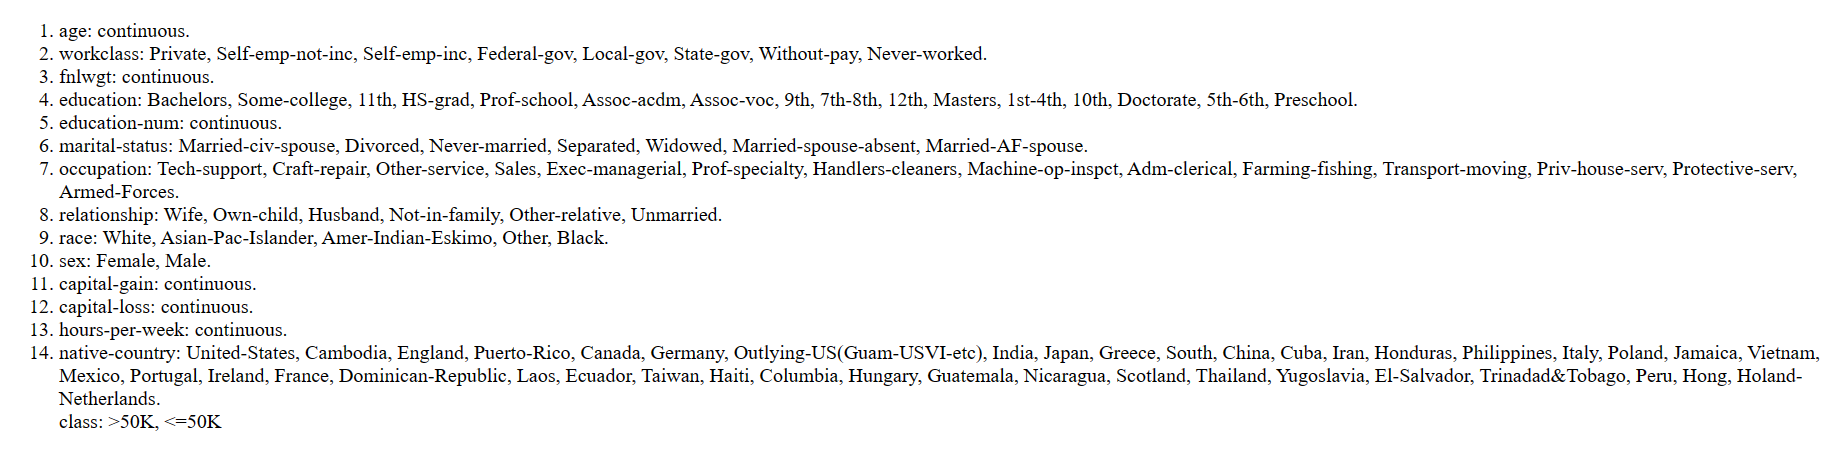

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

filename = ('/content/Adult income.zip')
df = pd.read_csv(filename)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [72]:
# shape
print(f"This dataset has {df.shape[0]} rows, each representing a reading of a \
Income Type. It has {df.shape[1]} columns, {df.shape[1]-1} feature columns \
(X) and 1 target column (y).")

This dataset has 48842 rows, each representing a reading of a Income Type. It has 15 columns, 14 feature columns (X) and 1 target column (y).


In [73]:
# check for and delete any duplicates
print(f"There are {df.duplicated().sum()} duplicated rows in this dataset.")
print("Deleting duplicates...")
df.drop_duplicates(inplace = True)
print(f"Now there are {df.duplicated().sum()} duplicated rows in this dataset.")

There are 52 duplicated rows in this dataset.
Deleting duplicates...
Now there are 0 duplicated rows in this dataset.


In [74]:
# I will drop column "fnlwgt" because its unique variable does not provide informational data
df = df.drop('fnlwgt', axis=1)

In [75]:
# I will Identify missing values.
sum_missing = df.isna().sum()
df.isna().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [76]:
# Find and fix any inconsistent categories of data
df.describe(include = 'object').round(2)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


In [77]:
#8)For any numerical columns, obtain the summary statistics of each (min, max, mean).
df.describe(include = 'number').round(2)

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.00,48790.00,48790.00,48790.00,48790.00
mean,38.65,10.08,1080.22,87.60,40.43
std,13.71,2.57,7455.91,403.21,12.39
min,17.00,1.00,0.00,0.00,1.00
25%,28.00,9.00,0.00,0.00,40.00
50%,37.00,10.00,0.00,0.00,40.00
75%,48.00,12.00,0.00,0.00,45.00
max,90.00,16.00,99999.00,4356.00,99.00


In [78]:
#check for inconsistent values in Numeric columns
for col in list(df.select_dtypes(include='number')):
  print(col)
  print(df[col].value_counts())
  print()

age
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

educational-num
9     15770
10    10863
13     8013
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       655
16      594
3       507
2       245
1        81
Name: educational-num, dtype: int64

capital-gain
0        44755
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: capital-gain, Length: 123, dtype: int64

capital-loss
0       46508
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: capital-loss, Length: 99, dtype: int64

hours-per-week
40    22773
50     4242
45     2715
60     2177
35     1934
      ...  
69        1
87        1
94        1
82        1
79        1
Name: ho

# Univariate Visuals for the target and features

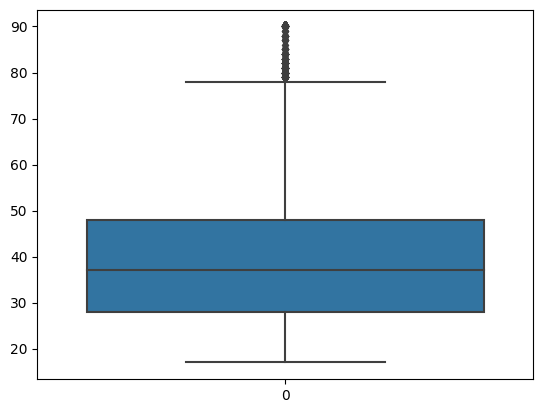

In [79]:
sns.boxplot(df['age']);

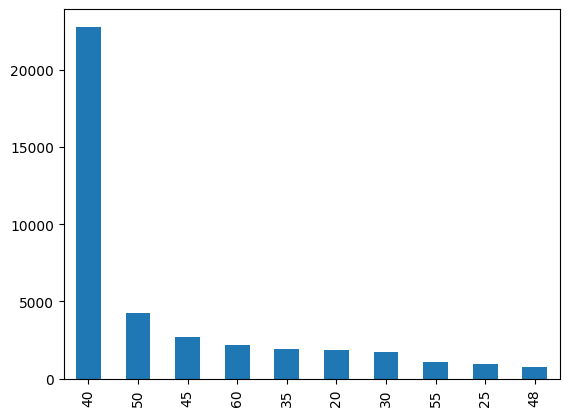

In [80]:
df['hours-per-week'].value_counts().head(10).plot.bar();

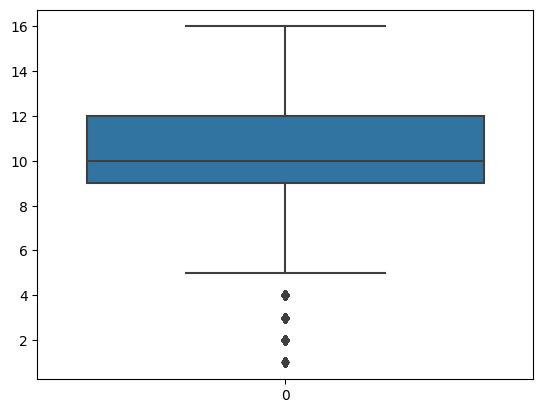

In [81]:
sns.boxplot(df['educational-num']);

In [82]:
# Remove "?" value from all columns
mask = (df != '?').all(1)
df = df.loc[mask]
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


#Multivariate Exploratory Visualizations

##Barplot

In [83]:
# Categorical variables will be further analyzed
# make list of all categorical columns
categorical_columns = list(df.select_dtypes(include = 'object'))

# check list
print(categorical_columns)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


In [84]:
df.drop(df[df['occupation'].isna()].index, inplace = True)

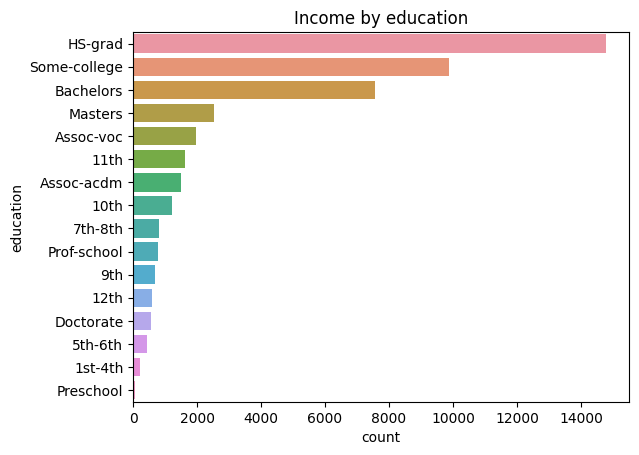

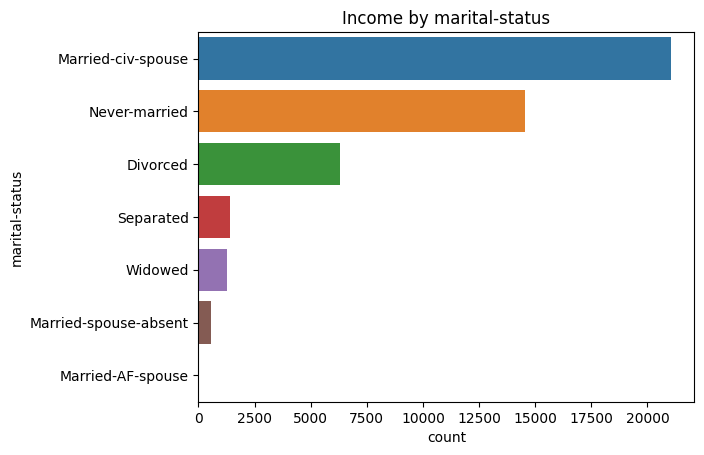

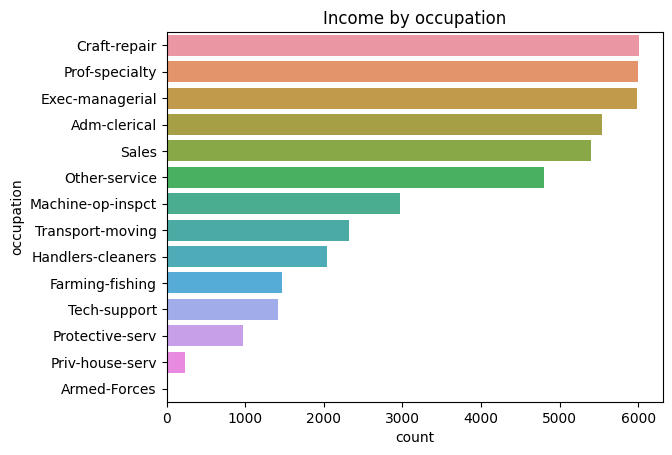

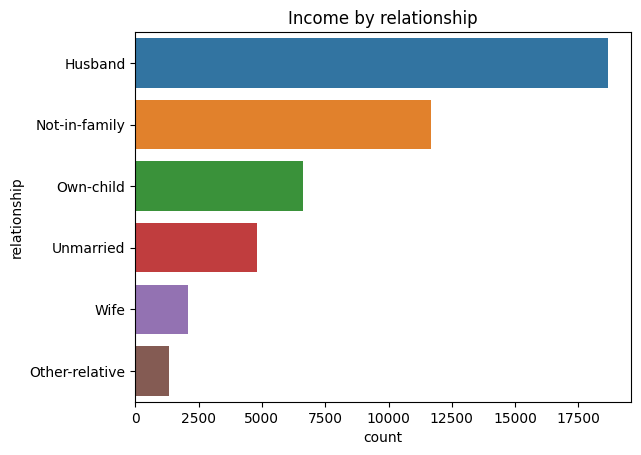

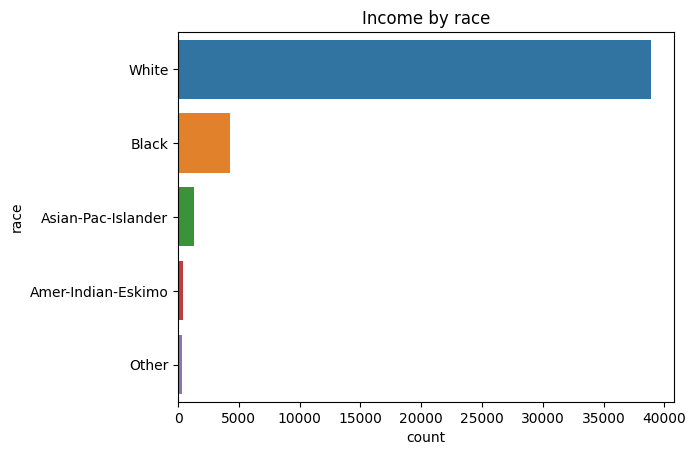

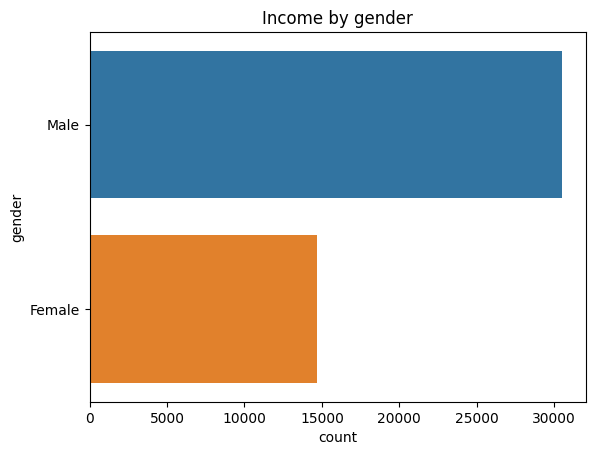

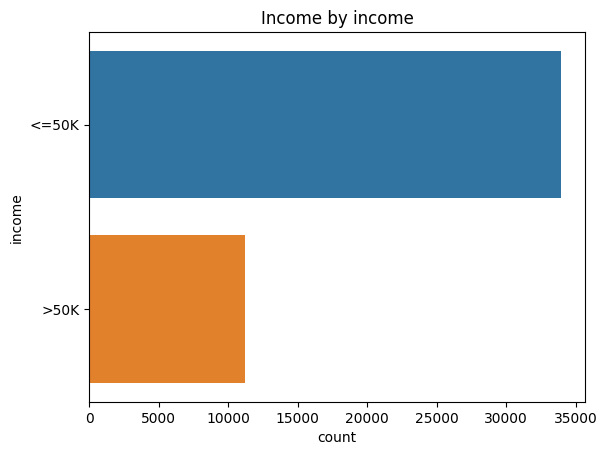

In [85]:
# Analyze barplots for categorical columns on income
# Remove native-country, which has too many unique values for the plots to be informational
categorical_columns.remove('native-country')
categorical_columns.remove('workclass')


# for each categorical column
for column in categorical_columns:

  # set variable for column name
  column_name = column

  # set the label order for bars
  label_order = df[column].value_counts().index

  # draw barplots with seaborn
  plot = sns.countplot(data = df,
                      y = column,
                      order = label_order)

  # set title
  plot.set_title('Income by ' + column_name)

  # show plot
  plt.show()

  # print blank lines for readability
  print('\n\n')

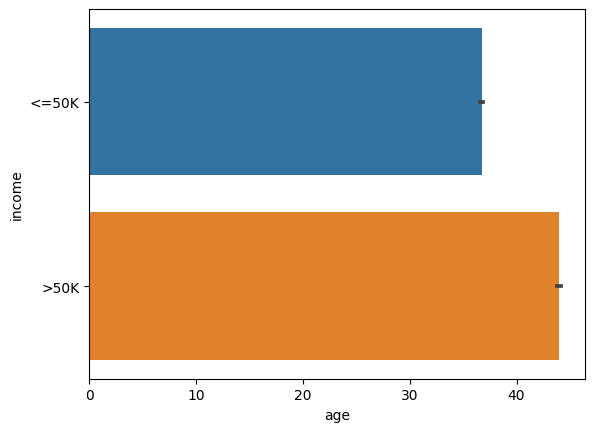

In [86]:
ax = sns.barplot(data=df, x="age", y='income')

##Heatmap

The following heatmap shows the corealation coefficient between each numeric variable. This is another was to visualize the information provided above.

In [87]:
import warnings
warnings.filterwarnings('ignore')

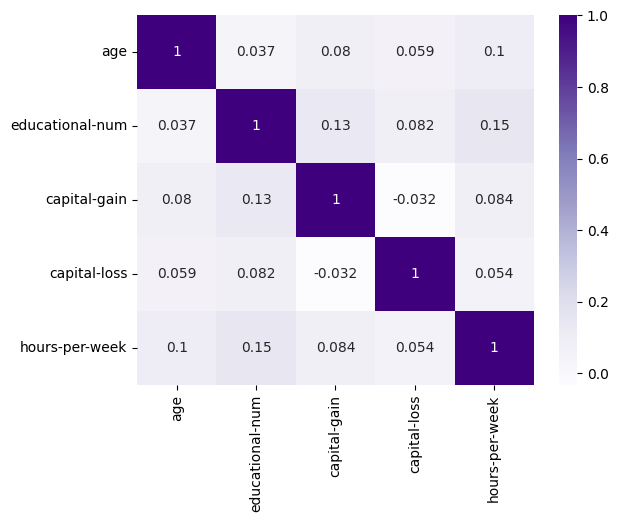

In [88]:
from pandas.io.formats.style_render import DataFrame
# explore correlation between numerical columns
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True);


##Histogram

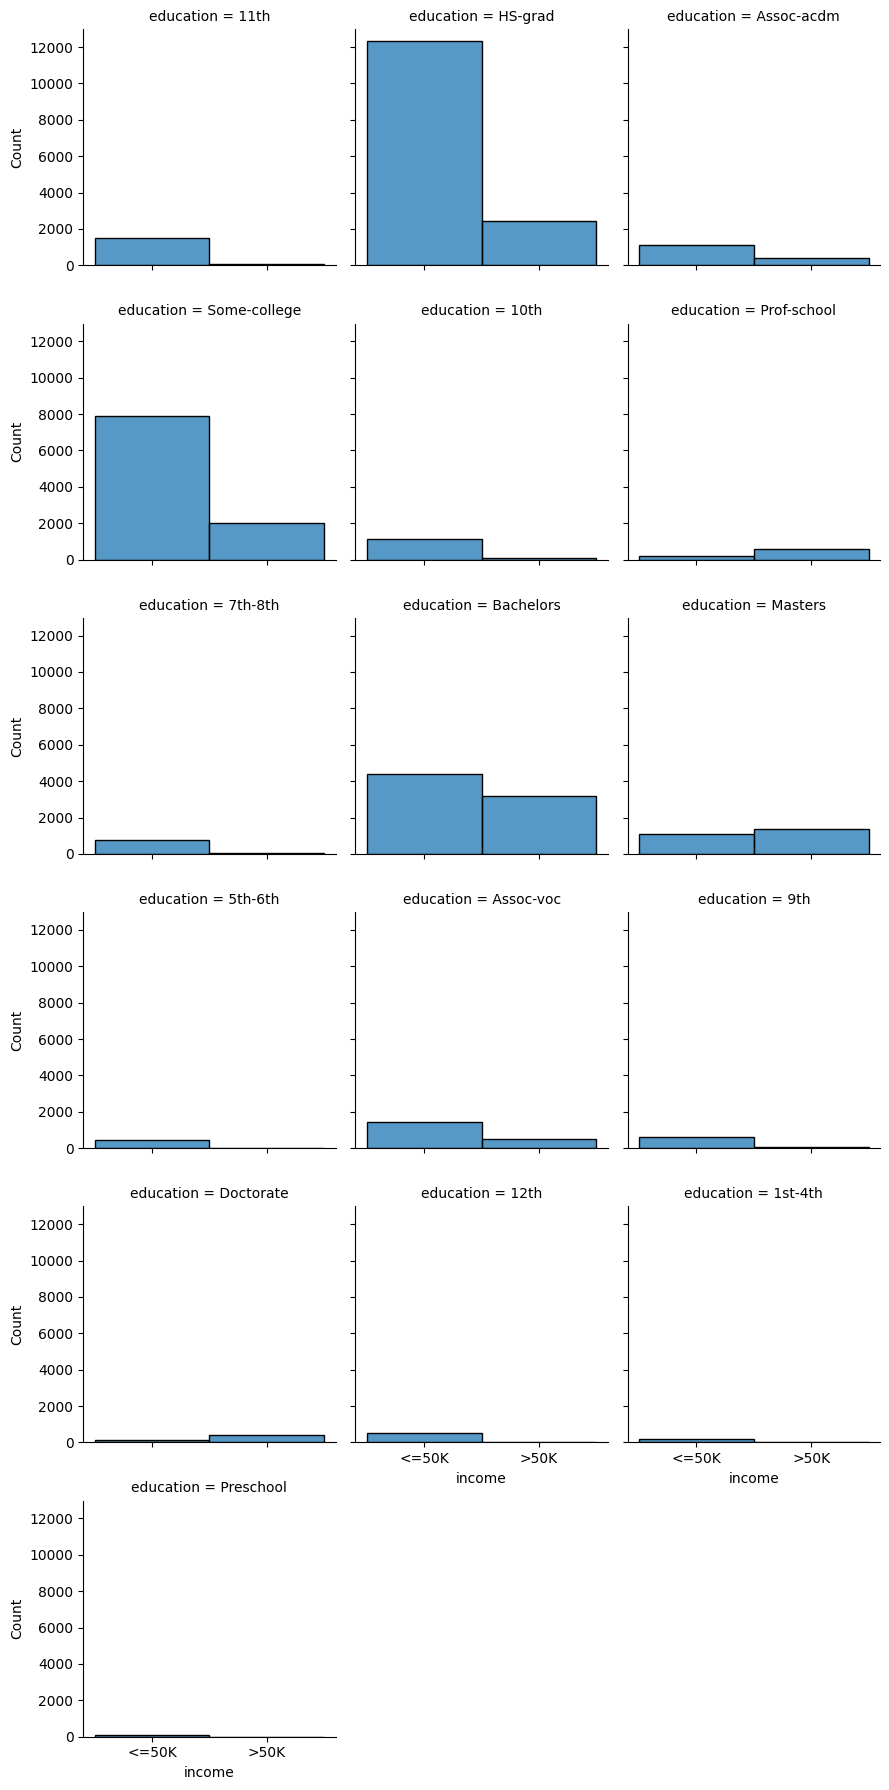

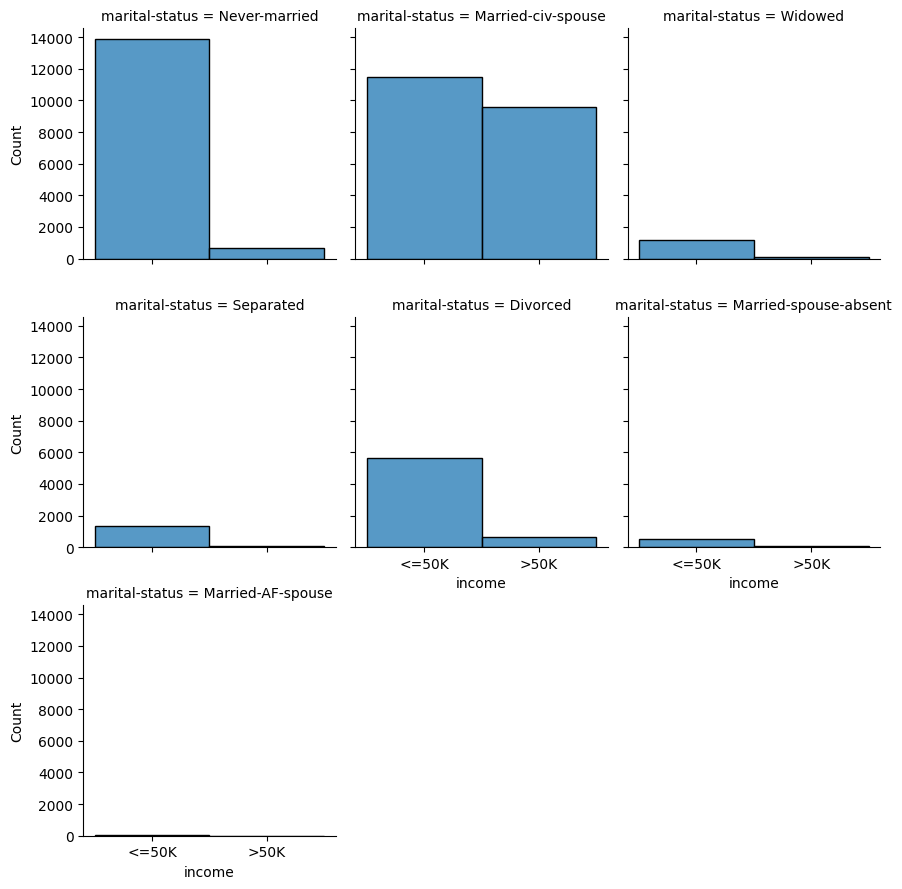

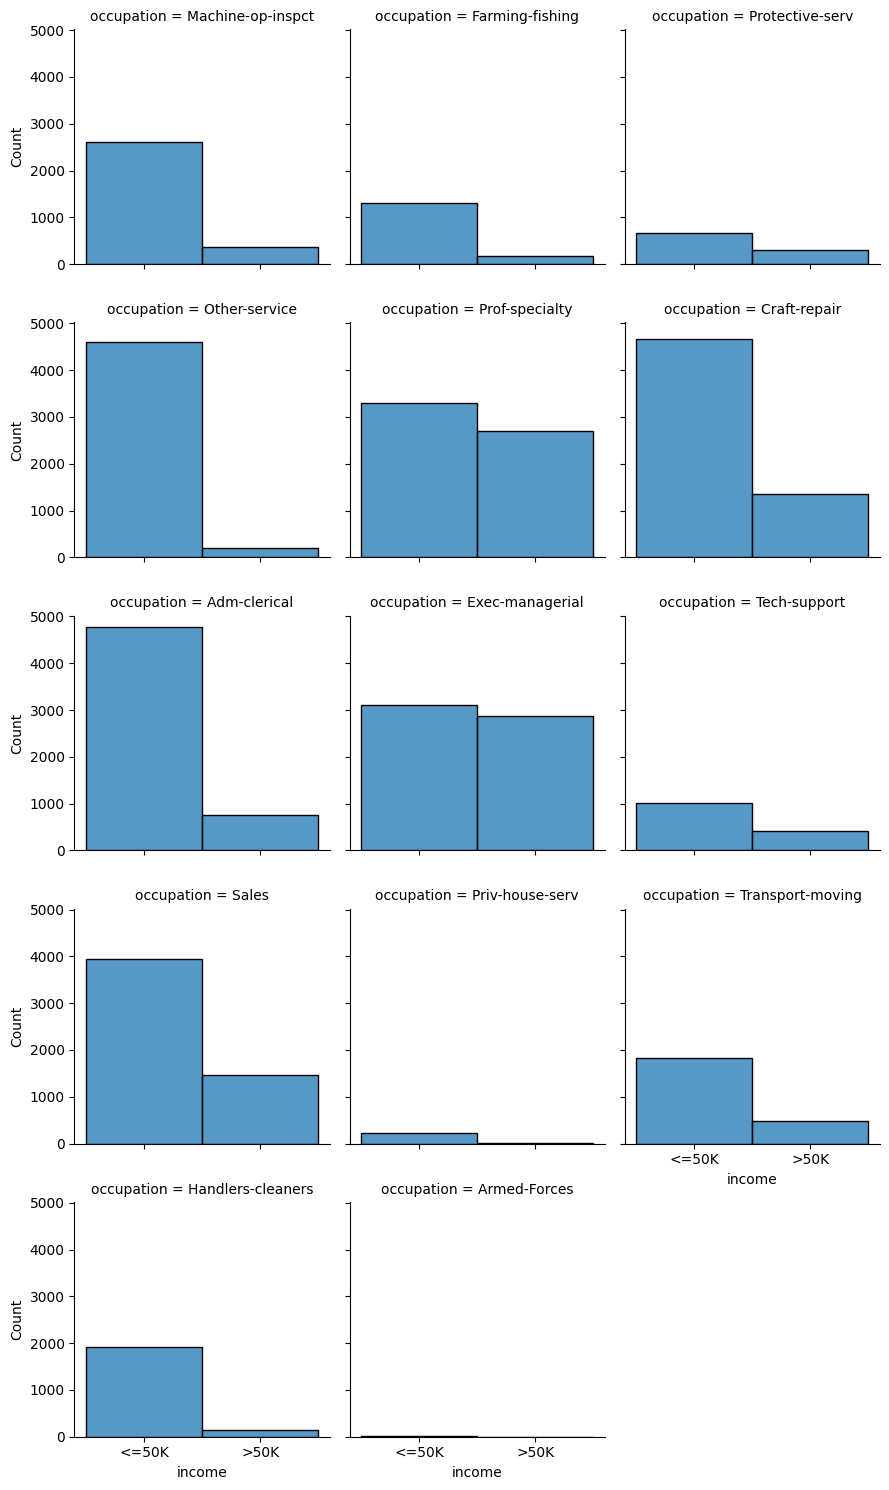

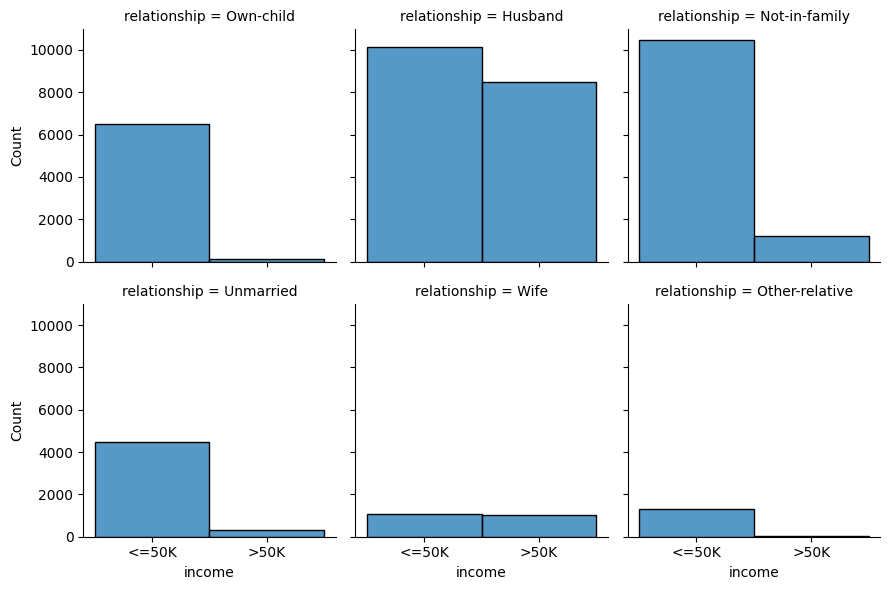

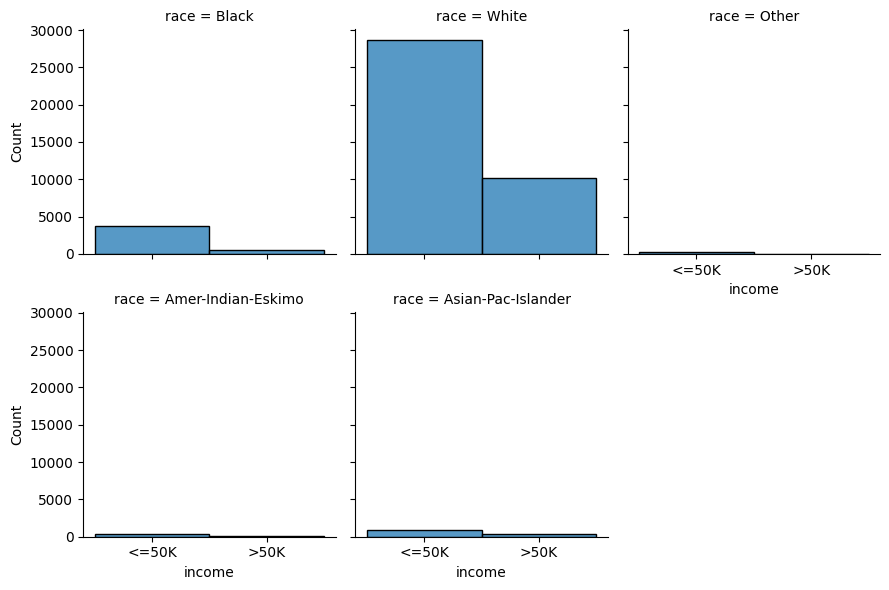

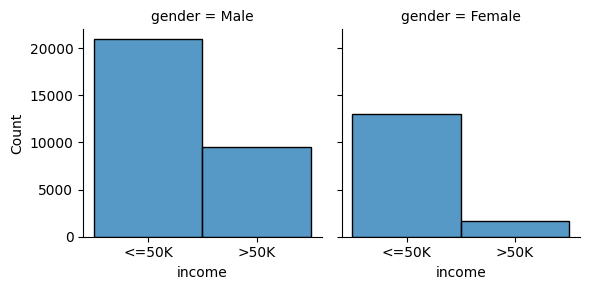

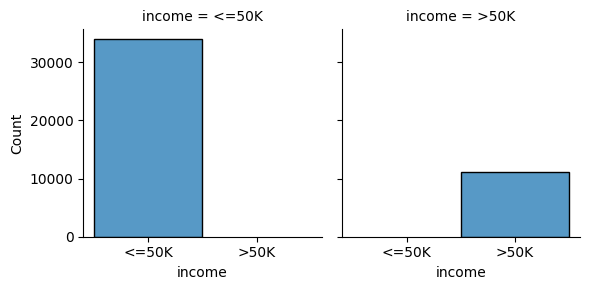

In [89]:
# Analyze Histograms for all categorical columns on income greater, less than and equal to $50K
# for each categorical column
for column in categorical_columns:

  # if the number of unique values in the column is more than 3
  if len(df[column].value_counts().index) > 3:

    # initiate sns.FacetGrid with column wrapping
    plot = sns.FacetGrid(df, col = column, col_wrap = 3)

    # draw histograms in the facetgrid
    plot.map(sns.histplot, 'income')

  # else (number of unique values in the column is 3 or less)
  else:

    # initiate sns.FacetGrid without column wrapping
    plot = sns.FacetGrid(df, col = column)

    # draw histograms in the facetgrid
    plot.map(sns.histplot, 'income')

  # show plot
  plt.show()

  # print blank lines for readability
  print('\n\n')


#Two visualizations for Stakeholder

From the following analysis we can determine individuals making more than 50K, the average age of that group is 44. Where those making less than 50K, the average age is 36.

In [90]:
# We will determine what average age group makes more or less than $50k
means = df.groupby('income')['age'].mean().sort_values(ascending=False)
means

income
>50K     44.006785
<=50K    36.758926
Name: age, dtype: float64

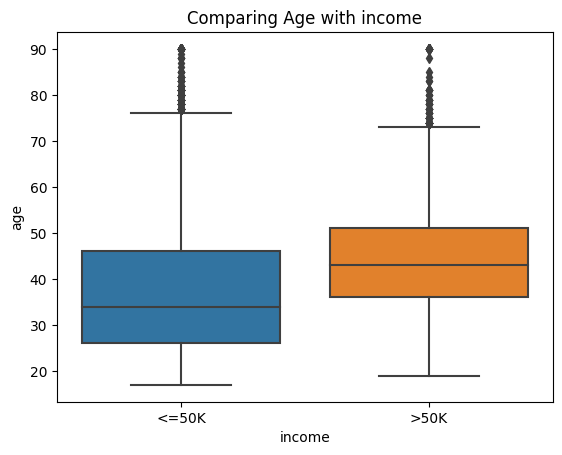

In [91]:
ax = sns.boxplot(data=df, x='income', y="age")
ax.set_title("Comparing Age with income");

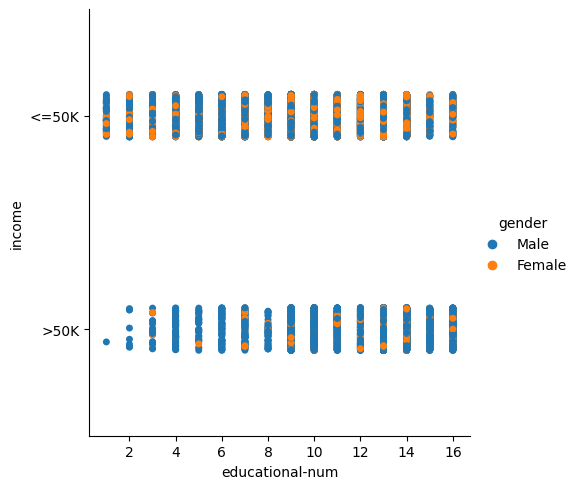

In [92]:
# Looking at this visual we can determine there are more females making more than $50K
Income = sns.catplot(x="educational-num", y="income",
                hue="gender",
                data=df)

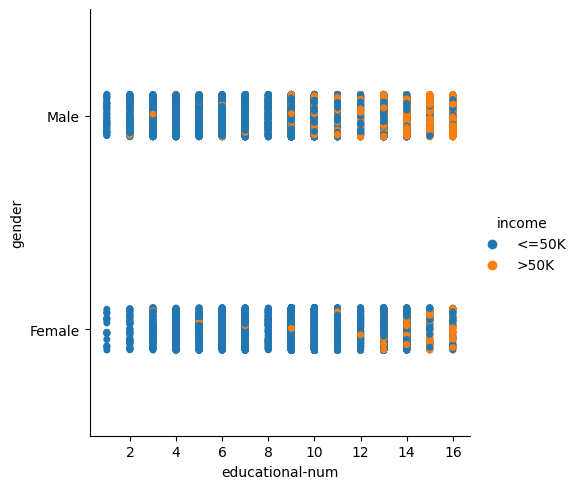

In [93]:
# Looking at this visual we can determine Men that have a longer term in education are making on average less than $50K
Income = sns.catplot(x="educational-num", y="gender",
                hue="income",
                data=df)

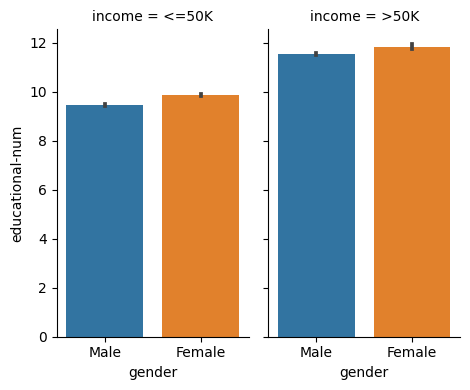

In [94]:
# Additional Analysis of variation in wage between woman and men
sns.catplot(
    data=df, x="gender", y="educational-num", col="income",
    kind="bar", height=4, aspect=.6,
);

#PreProcessing

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

In [96]:
df['income'].value_counts(normalize = True)

<=50K    0.752031
>50K     0.247969
Name: income, dtype: float64

In [97]:
# assign target variable (y) and feature matrix (X)
target = 'income'
y = df[target]
X = df.drop(columns = target)

In [98]:
# check
print(f"y: \n{y}")
print()
print(f"X: \n{X}")

y: 
0        <=50K
1        <=50K
2         >50K
3         >50K
5        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 45175, dtype: object

X: 
       age     workclass     education  educational-num      marital-status  \
0       25       Private          11th                7       Never-married   
1       38       Private       HS-grad                9  Married-civ-spouse   
2       28     Local-gov    Assoc-acdm               12  Married-civ-spouse   
3       44       Private  Some-college               10  Married-civ-spouse   
5       34       Private          10th                6       Never-married   
...    ...           ...           ...              ...                 ...   
48837   27       Private    Assoc-acdm               12  Married-civ-spouse   
48838   40       Private       HS-grad                9  Married-civ-spouse   
48839   58       Private       HS-grad                9             Wido

In [99]:
# model validation (train/test split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [100]:
# check
print(f"X_train: {X_train.shape} \n\
X_test: {X_test.shape} \n\
y_train: {y_train.shape} \n\
y_test: {y_test.shape}")

X_train: (33881, 13) 
X_test: (11294, 13) 
y_train: (33881,) 
y_test: (11294,)


In [101]:
# define classification metrics function
def class_metrics(model_pipe, X_train, X_test, y_train, y_test, name):

  # fit on training data
  model_pipe.fit(X_train, y_train)

  # print name of model
  print(f"{name} metrics:")

  # create test data predictions
  test_pred = model_pipe.predict(X_test)

  # print classification report
  print(classification_report(y_test, test_pred))

  # display confusion matrix
  display(ConfusionMatrixDisplay.from_predictions(y_test,
                                                  test_pred,
                                                  normalize='true'))

In [102]:
# inspect value counts for each column in X_train
for column in X_train:
  print(f"{column}: {df[column].dtype}\n{X_train[column].value_counts(dropna = False)} \n\n")

age: int64
36    964
33    955
35    946
23    941
37    939
     ... 
83      6
85      4
88      3
89      1
86      1
Name: age, Length: 73, dtype: int64 


workclass: object
Private             24941
Self-emp-not-inc     2846
Local-gov            2298
State-gov            1494
Self-emp-inc         1237
Federal-gov          1052
Without-pay            13
Name: workclass, dtype: int64 


education: object
HS-grad         11086
Some-college     7355
Bachelors        5684
Masters          1881
Assoc-voc        1479
11th             1199
Assoc-acdm       1126
10th              929
7th-8th           631
Prof-school       589
9th               514
12th              437
Doctorate         413
5th-6th           339
1st-4th           171
Preschool          48
Name: education, dtype: int64 


educational-num: int64
9     11086
10     7355
13     5684
14     1881
11     1479
7      1199
12     1126
6       929
4       631
15      589
5       514
8       437
16      413
3       339
2       171
1

In [103]:
#instantiate the selectors to for numeric and categorical data types
cat_selector = make_column_selector(dtype_include='object')
cat_selector(X_train)

num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [104]:
# make imputers (will use 'most_frequent' for categorical data, 'mean' for numeric data)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy = 'mean')

In [105]:
# make scaler for numeric columns (numeric and ordinal data needs to be scaled)
scaler = StandardScaler()

In [106]:
# make scaler for categorical columns
ohe = OneHotEncoder(handle_unknown = 'ignore',
                    sparse_output = False)

In [107]:
# make numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [108]:
# make categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [109]:
# # make tuples for column transformer
numeric_tuple = (numeric_pipe, num_selector)
categorical_tuple = (categorical_pipe, cat_selector)

In [110]:
# create preprocessor object (column transformer)
preprocessor = make_column_transformer(numeric_tuple, categorical_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13d2a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13e410>)])

In [111]:
#Fit to X train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13d2a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13e410>)])

In [112]:
# transform both training and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

##Random Tree Model

In [113]:
# create pipeline with scaler and default random forest model
%%time
rf_def_pipe = make_pipeline(preprocessor, RandomForestClassifier())
rf_def_pipe.fit(X_train, y_train)

CPU times: user 5.68 s, sys: 74.4 ms, total: 5.75 s
Wall time: 5.87 s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13d2a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13e410>)])),
                ('randomforestclassifier', RandomForestClassifier())])

In [114]:
# get accuracy for model
%%time
print(f"Model's accuracy score on training data: {rf_def_pipe.score(X_train, y_train)}")
print(f"Model's accuracy score on testing data: {rf_def_pipe.score(X_test, y_test)}")

Model's accuracy score on training data: 0.9741448009208701
Model's accuracy score on testing data: 0.839029573224721
CPU times: user 1.76 s, sys: 15.2 ms, total: 1.78 s
Wall time: 1.83 s


In [132]:
# create pipeline with scaler and default random forest model
%%time
rf_pca_pipe = make_pipeline(preprocessor, PCA(n_components=0.90), RandomForestClassifier())
rf_pca_pipe.fit(X_train, y_train)

CPU times: user 21.9 s, sys: 282 ms, total: 22.1 s
Wall time: 21.7 s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13d2a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13e410>)])),
                ('pca', PCA(n_components=0.9)),
                ('randomforestclassifier', RandomForestClassifier())])

In [133]:
# get accuracy for model
%%time
print(f"Model's accuracy score on training data: {rf_pca_pipe.score(X_train, y_train)}")
print(f"Model's accuracy score on testing data: {rf_pca_pipe.score(X_test, y_test)}")

Model's accuracy score on training data: 0.9741448009208701
Model's accuracy score on testing data: 0.8398264565255888
CPU times: user 1.29 s, sys: 265 ms, total: 1.55 s
Wall time: 1.32 s


In [117]:
# consider tuning hyperparameters
# example from LP: max_depth
rf_def_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13d2a0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                       

In [118]:

print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in test data')
print()
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print()
print('Shape of data is', X_train_processed.shape)
print(X_train_processed)

0 missing values in training data
0 missing values in test data

All data in X_train_processed are float64
All data in X_test_processed are float64

Shape of data is (33881, 103)
[[ 0.71923044 -0.04530472 -0.14682122 ...  1.          0.
   0.        ]
 [-0.03989314 -0.43608103 -0.14682122 ...  1.          0.
   0.        ]
 [-1.17857852 -0.04530472 -0.14682122 ...  1.          0.
   0.        ]
 ...
 [ 0.33966865 -0.43608103 -0.14682122 ...  1.          0.
   0.        ]
 [-0.26763022  1.1270242  -0.14682122 ...  1.          0.
   0.        ]
 [-0.49536729 -0.43608103  0.53552069 ...  1.          0.
   0.        ]]


Random Forest Default Model metrics:
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.90      8501
        >50K       0.70      0.63      0.66      2793

    accuracy                           0.84     11294
   macro avg       0.79      0.77      0.78     11294
weighted avg       0.84      0.84      0.84     11294



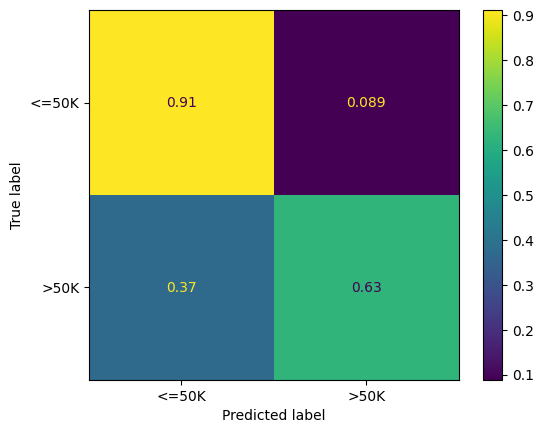

In [119]:
# evaluate default rf model
rf_def_metrics = class_metrics(rf_def_pipe,
                               X_train,
                               X_test,
                               y_train,
                               y_test,
                               'Random Forest Default Model')

rf_def_metrics

##Decision Tree Model

In [120]:
# instantiate model with default parameter settings
dec_tree_class = DecisionTreeClassifier(random_state = 42)

In [121]:
dec_tree_pipe = make_pipeline(preprocessor, DecisionTreeClassifier())

In [122]:
# fit model on training data
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13d2a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13e410>)])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [123]:
# get accuracy for model
print(f"Model's accuracy score on training data: {dec_tree_pipe.score(X_train, y_train)}")
print(f"Model's accuracy score on testing data: {dec_tree_pipe.score(X_test, y_test)}")

Model's accuracy score on training data: 0.9741448009208701
Model's accuracy score on testing data: 0.8136178501859395


In [124]:
#tuning hyperparameters
dec_tree_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13d2a0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                       

Decision Tree Model metrics:
              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88      8501
        >50K       0.62      0.61      0.62      2793

    accuracy                           0.81     11294
   macro avg       0.75      0.74      0.75     11294
weighted avg       0.81      0.81      0.81     11294



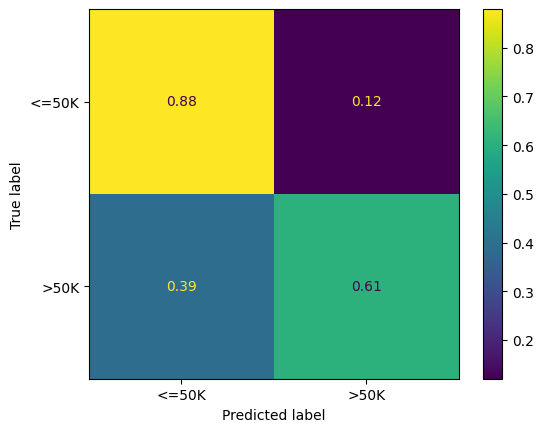

In [125]:
# evaluate default dt model
dec_tree_metrics = class_metrics(dec_tree_pipe,
                               X_train,
                               X_test,
                               y_train,
                               y_test,
                               'Decision Tree Model')

dec_tree_metrics

##Logistic Regression

In [139]:
# create pipeline with scaler and default logistic regression model
%%time
logreg_def_pipe = make_pipeline(preprocessor, LogisticRegression())
# fit model on training data
logreg_def_pipe.fit(X_train, y_train)

CPU times: user 1.55 s, sys: 352 ms, total: 1.91 s
Wall time: 1.15 s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13d2a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13e410>)])),
                ('logisticregression', LogisticRegression())])

In [140]:
# get accuracy for model
%%time
print(f"Model's accuracy score on training data: {logreg_def_pipe.score(X_train, y_train)}")
print(f"Model's accuracy score on testing data: {logreg_def_pipe.score(X_test, y_test)}")

Model's accuracy score on training data: 0.8491484903043004
Model's accuracy score on testing data: 0.8454046396316628
CPU times: user 319 ms, sys: 103 ms, total: 422 ms
Wall time: 311 ms


In [141]:
# create pipeline with scaler and default logistic regression model
%%time
logreg_pca_pipe = make_pipeline(preprocessor, PCA(n_components=0.90), LogisticRegression())
# fit model on training data
logreg_pca_pipe.fit(X_train, y_train)

CPU times: user 1.15 s, sys: 302 ms, total: 1.45 s
Wall time: 900 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13d2a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13e410>)])),
                ('pca', PCA(n_components=0.9)),
                ('logisticregression', LogisticRegression())])

In [142]:
# get accuracy for model
%%time
print(f"Model's accuracy score on training data: {logreg_pca_pipe.score(X_train, y_train)}")
print(f"Model's accuracy score on testing data: {logreg_pca_pipe.score(X_test, y_test)}")

Model's accuracy score on training data: 0.8445146247159174
Model's accuracy score on testing data: 0.8418629360722507
CPU times: user 343 ms, sys: 170 ms, total: 513 ms
Wall time: 361 ms


In [130]:
#tuning hyperparameters
logreg_def_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ed13d2a0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                       

Logistic Regression Default Model metrics:
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      8501
        >50K       0.72      0.61      0.66      2793

    accuracy                           0.85     11294
   macro avg       0.80      0.77      0.78     11294
weighted avg       0.84      0.85      0.84     11294



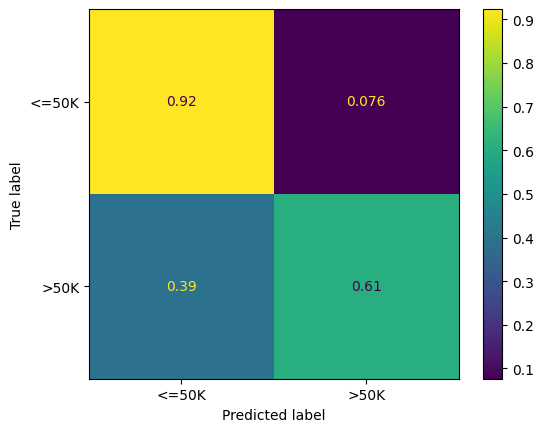

In [131]:
# evaluate default logistic regression model
logreg_def_metrics = class_metrics(logreg_def_pipe,
                                   X_train,
                                   X_test,
                                   y_train,
                                   y_test,
                                   'Logistic Regression Default Model')

logreg_def_metrics

#Chosen Production Model

Based on my evaluation of the metrics for each model, The Logistics egression model shows the best results for my business problem. The goal is to determine the best precision for income greater, less than or equal to $50k. This model provides the best testing score.